In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

boston = pd.read_csv("/content/boston.csv")

We start off by importing the packages and dataset into the program

In [5]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [6]:
print("No. of features = ",len(boston.columns))
print("No. of training data = ",len(boston))

No. of features =  14
No. of training data =  506


In [7]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

We also see how many rows and columns i.e number of training rows and features there are in the dataset.

We now check how many 0s are there in the dataset.

In [8]:
i=1
print("## | Column Name | Count")
print("------------------------")
for c in boston.columns:
  print(f"{i:02d}",c.ljust(11," "),boston[c].isna().sum(),sep=" | ")
  i+=1

## | Column Name | Count
------------------------
01 | CRIM        | 0
02 | ZN          | 0
03 | INDUS       | 0
04 | CHAS        | 0
05 | NOX         | 0
06 | RM          | 0
07 | AGE         | 0
08 | DIS         | 0
09 | RAD         | 0
10 | TAX         | 0
11 | PTRATIO     | 0
12 | B           | 0
13 | LSTAT       | 0
14 | MEDV        | 0


There are no NaN or other missing values in the data

In [9]:
i=1
print("## | Column Name | Count")
print("-------------------------")
for c in boston.columns:
  t=(boston[c]==0).sum()
  print(f"{i:02d}",c.ljust(11," "),t,sep=" | ")
  i+=1

## | Column Name | Count
-------------------------
01 | CRIM        | 0
02 | ZN          | 372
03 | INDUS       | 0
04 | CHAS        | 471
05 | NOX         | 0
06 | RM          | 0
07 | AGE         | 0
08 | DIS         | 0
09 | RAD         | 0
10 | TAX         | 0
11 | PTRATIO     | 0
12 | B           | 0
13 | LSTAT       | 0
14 | MEDV        | 0


We see that two columns ZN and CHAS are having significant number of zeroes.

However, ZN is **proportion of residential land zoned for lots over 25,000 sq.ft.** This data is allowed to have zeroes.

Similarly, CHAS is **Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)** This data too is allowed to have zeroes.

Since our entire data is continous numerical in range, there are no features that need encoding.

In [10]:
print(boston.var())

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64


In [11]:
corr_matrix = boston.corr()
corr_matrix.drop(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'],axis=0,inplace=True)
corr_matrix[corr_matrix.abs()>0.7]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.737663,1.0


For the univariate analysis we pick the column with the highest correlation with the output feature. Here the output feature is MEDV and we take LSTAT as the input feature for the univariate linear regression.

In [12]:
print("Number of duplicate rows: "+str(boston.duplicated().sum()))

Number of duplicate rows: 0


There are no duplicate rows in the dataset

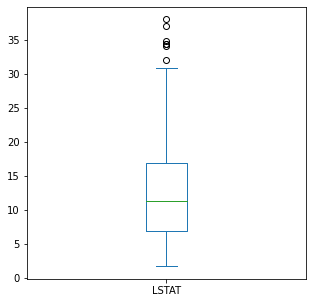

In [13]:
boston['LSTAT'].plot(kind='box',figsize=(5,5))
plot.show()

There doesn't seem to be any outliers  for the given feature as well

Then we split the data into test and train data

In [14]:
old_mean = boston.mean()
old_std = boston.std(ddof=0)
boston = (boston - old_mean)/old_std
boston_train = boston.loc[:355].copy(deep=True)
boston_test = boston.loc[356:].copy(deep=True)
output_price = boston_train['MEDV'].to_numpy()
input_feature = boston_train['LSTAT'].to_numpy()

We plot the scatter of the input feature against the target feature

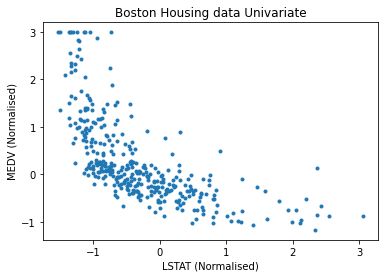

In [15]:
plot.scatter(input_feature,output_price,marker='.')
plot.title("Boston Housing data Univariate")
plot.xlabel("LSTAT (Normalised)")
plot.ylabel("MEDV (Normalised)")
plot.show()

We now run gradient descent

In [16]:
x0 = np.ones(len(input_feature))
X = np.stack([x0,input_feature])
#print(X.shape)

m=len(input_feature) # the number of training rows
alpha = 0.01  # learning rate

theta = np.random.rand(X.shape[0])
#print(theta.shape)

y = output_price
#print(y.shape)

cost_list = []
cost_list.append(1e10) # starting off with a large value for the cost function. From here we will optimise down to minimum

iter = 0 # keeping track of iterations of gradient descent

run=True
while run:
  
  iter+=1

  # we are calculating prediction multiplying X and theta matrix 
  prediction = np.dot(theta, X)
  
  # we calculate the error that is the difference from the expected cost from prediction
  error = prediction - y

  # we then calculate the mean squared error
  cost = 1/(2*m) * np.dot(error.T, error)

  cost_list.append(cost) 

  theta = theta - (alpha * (1/m) * np.dot(X, error)) # simultaneous theta 0 to theta n update 
  
  changeInCost = cost_list[iter-1]-cost_list[iter] # change in cost between every iteration
  if changeInCost < 1e-8: # if the change is small enough then we say gradient descent has converged to the minima
    run=False # so we break out of the loop

dummy=cost_list.pop(0)

print(theta)

[ 0.03214444 -0.74204529]


we then plot the lowering of cost across mulitple iterations

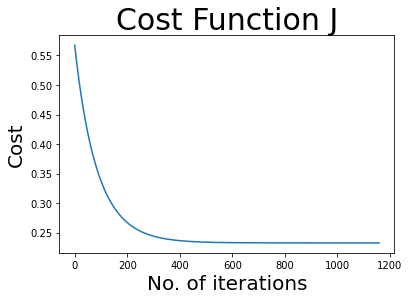

In [17]:
plot.title('Cost Function J', size = 30)
plot.xlabel('No. of iterations', size=20)
plot.ylabel('Cost', size=20)
plot.plot(cost_list)
plot.show()

From the obtained theta we plot the decision boundary line onto the scatter plot

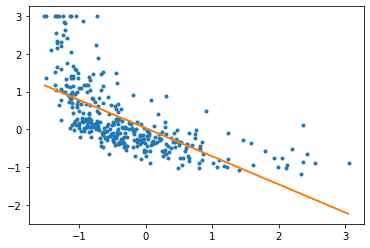

In [18]:
plot.clf()
plot.scatter(input_feature, output_price,marker='.',label='C0')
y=theta[0]+input_feature*theta[1]
plot.plot(input_feature,y,'C1')
plot.show()

Finally we calculate the mean squared error

In [19]:
output_price_test = boston_test['MEDV'].to_numpy()
input_feature_test = boston_test['LSTAT'].to_numpy()

x0 = np.ones(len(input_feature_test))
X = np.stack([x0,input_feature_test])
predictions_test = np.dot(theta,X)

error = output_price_test - predictions_test
squared_error = np.dot(error,error.T)
mean_squared_error = squared_error/len(input_feature_test)
print(mean_squared_error)

0.437189515529147


**Normal method**

Again we are relying on the matrix formula for calculation

In [20]:
x0 = np.ones(len(input_feature))
X = np.stack([x0,input_feature])

y = output_price

XXT = np.matmul(X.T,X)

XXT_inv = np.linalg.pinv(XXT)

XXT_inv_XT = np.matmul(XXT_inv,X.T)

theta_normal = np.matmul(XXT_inv_XT.T,y)

print(theta_normal)

[ 0.03109567 -0.74351233]


The theta is same as the gradient descent uptil the second decimal point. That is because the matrix that I end up for inverse is singular and we have to do partial inverse which will mean the answer will not be accurate.

Now calculating the mean squared error of the normal method:

In [21]:
output_price_test = boston_test['MEDV'].to_numpy()
input_feature_test = boston_test['LSTAT'].to_numpy()

x0 = np.ones(len(input_feature_test))
X = np.stack([x0,input_feature_test])
predictions_test = np.dot(theta_normal,X)

error = output_price_test - predictions_test
squared_error = np.dot(error,error.T)
mean_squared_error = squared_error/len(input_feature_test)
print(mean_squared_error)

0.4370206518892171


Again, very similar mean squared error difference as well